<a href="https://colab.research.google.com/github/nilamaula26/Praktikum-Kuliah/blob/main/Linear_Regression_Laporan_PKL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
dataset= pd.read_csv("/content/data bencana.csv")
dataset.head(6)

,curah_hujan,jumlah_bencana
0,471.93,9
1,511.53,8
2,263.53,1
3,184.14,0
4,310.00,0
5,189.53,2


In [3]:
print("Jumlah dataset saya: "+str(len(dataset.index)))

Jumlah dataset saya: 12


In [4]:
dataset.describe()

,curah_hujan,jumlah_bencana
count,12.000000,12.000000
mean,283.603333,2.416667
std,147.412379,3.369875
min,96.870000,0.000000
25%,170.637500,0.000000
50%,276.100000,0.500000
75%,419.620000,3.750000
max,511.530000,9.000000


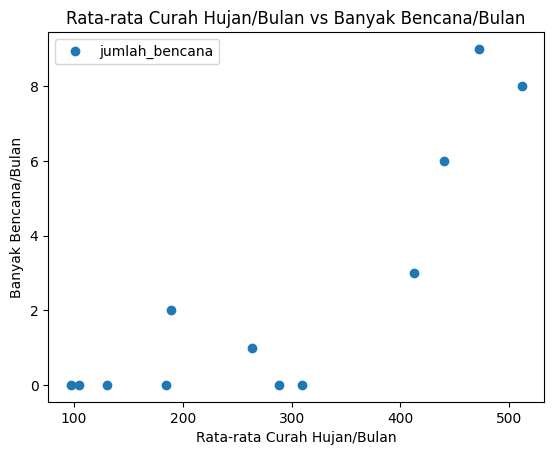

In [5]:
dataset.plot(x='curah_hujan', y='jumlah_bencana', style='o')
plt.title('Rata-rata Curah Hujan/Bulan vs Banyak Bencana/Bulan')
plt.xlabel('Rata-rata Curah Hujan/Bulan')
plt.ylabel('Banyak Bencana/Bulan')
plt.show()

Penentuan variabel dan pembagian data

In [6]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [21]:
#cv = KFold(n_splits=2, random_state=None, shuffle=False)
#for train_index, test_index in cv.split(x):
#   x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]

In [22]:
regressor.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = regressor.predict(x_test)

In [24]:
print(regressor.intercept_)

-0.7669077255417092


In [25]:
print(regressor.coef_)

[8.27702445]


In [26]:
dataframe = pd.DataFrame({'Data Sebenarnya': y_test, 'Data Prediksi': y_pred})
dataframe

,Data Sebenarnya,Data Prediksi
0,0,-0.103005
1,6,6.079712
2,0,3.487378
3,0,3.061610


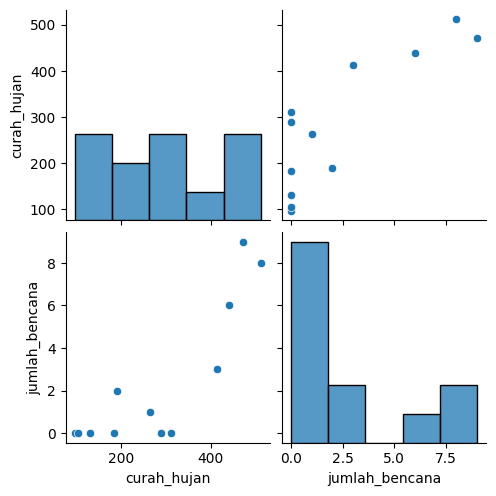

In [27]:
sns.pairplot(dataset)

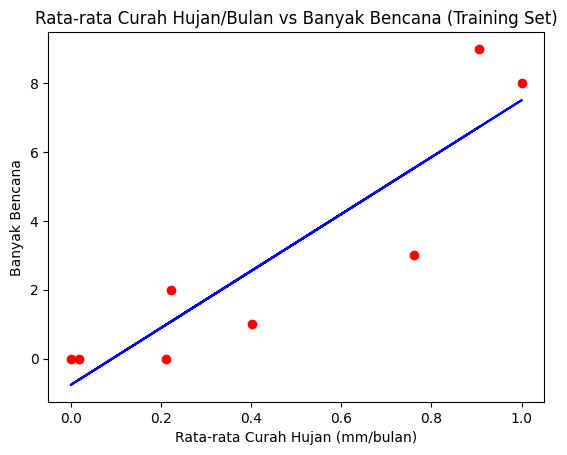

In [28]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Rata-rata Curah Hujan/Bulan vs Banyak Bencana (Training Set)')
plt.xlabel('Rata-rata Curah Hujan (mm/bulan)')
plt.ylabel('Banyak Bencana')
plt.show()

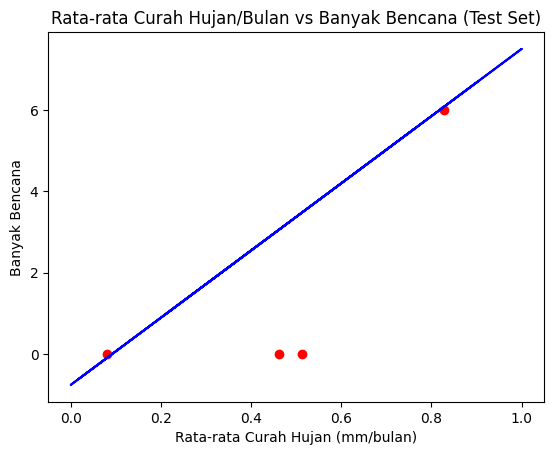

In [29]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Rata-rata Curah Hujan/Bulan vs Banyak Bencana (Test Set)')
plt.xlabel('Rata-rata Curah Hujan (mm/bulan)')
plt.ylabel('Banyak Bencana')
plt.show()